# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Четвертая лабораторная работа </center>
# <center> Акустические признаки </center>

In [ ]:
import librosa
import numpy as np
import scipy
import scipy.fft
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import librosa.filters
import hashlib
from glob import glob
import os
import sklearn

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Функция отрисовки аудио сигнала

In [ ]:
def draw_waveform(wav, sr, figsize=(14, 5)):
    # Отрисовка звукового сигнала во временной области
    plt.figure(figsize=figsize)
    librosa.display.waveshow(wav, sr=sr)
    plt.show()

### Для выполнения задания нам понадобится датасет *yes/no*.
Про датасет можно почитать тут https://www.openslr.org/1/

In [ ]:
# Скачаем его
#  надёжнее использовать скачивание вручную, либо попробовать строчку ниже
![ ! -f  waves_yesno.tar.gz ] && wget https://www.openslr.org/resources/1/waves_yesno.tar.gz
# И распакуем
!tar -xvzf waves_yesno.tar.gz

waves_yesno/
waves_yesno/1_0_0_0_0_0_1_1.wav
waves_yesno/1_1_0_0_1_0_1_0.wav
waves_yesno/1_0_1_1_1_1_0_1.wav
waves_yesno/1_1_1_1_0_1_0_0.wav
waves_yesno/0_0_1_1_1_0_0_0.wav
waves_yesno/0_1_1_1_1_1_1_1.wav
waves_yesno/0_1_0_1_1_1_0_0.wav
waves_yesno/1_0_1_1_1_0_1_0.wav
waves_yesno/1_0_0_1_0_1_1_1.wav
waves_yesno/0_0_1_0_1_0_0_0.wav
waves_yesno/0_1_0_1_1_0_1_0.wav
waves_yesno/0_0_1_1_0_1_1_0.wav
waves_yesno/1_0_0_0_1_0_0_1.wav
waves_yesno/1_1_0_1_1_1_1_0.wav
waves_yesno/0_0_1_1_1_1_0_0.wav
waves_yesno/1_1_0_0_1_1_1_0.wav
waves_yesno/0_0_1_1_0_1_1_1.wav
waves_yesno/1_1_0_1_0_1_1_0.wav
waves_yesno/0_1_0_0_0_1_1_0.wav
waves_yesno/0_0_0_1_0_0_0_1.wav
waves_yesno/0_0_1_0_1_0_1_1.wav
waves_yesno/0_0_1_0_0_0_1_0.wav
waves_yesno/1_1_0_1_1_0_0_1.wav
waves_yesno/0_1_1_1_0_1_0_1.wav
waves_yesno/0_1_1_1_0_0_0_0.wav
waves_yesno/README~
waves_yesno/0_1_0_0_0_1_0_0.wav
waves_yesno/1_0_0_0_0_0_0_1.wav
waves_yesno/1_1_0_1_1_0_1_1.wav
waves_yesno/1_1_0_0_0_0_0_1.wav
waves_yesno/1_0_0_0_0_0_0_0.wav
waves_y

P.S если у вас Windows, или по каким-либо еще причинам данные не скачались,
то их можно скачать руками отсюда: https://www.openslr.org/1/

### Загрузим один из файлов

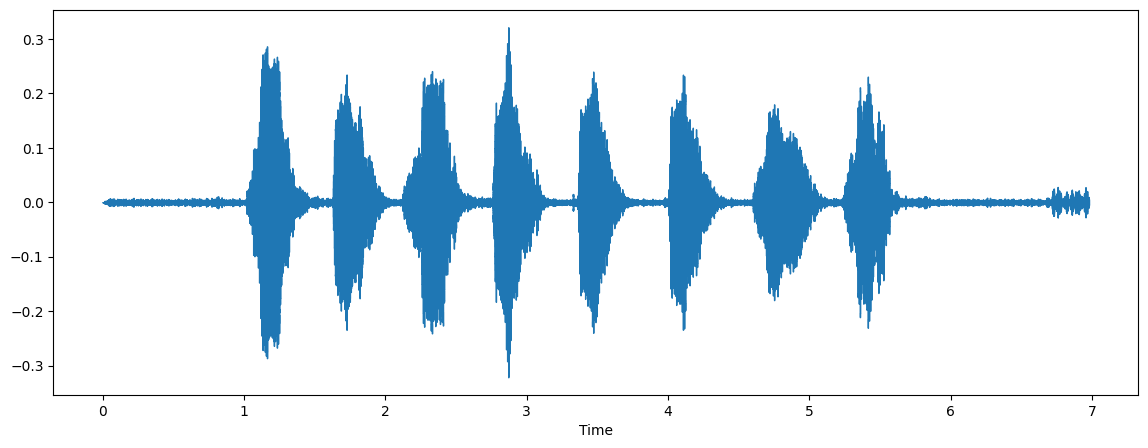

In [ ]:
wav, sr = librosa.load("waves_yesno/0_1_0_1_1_1_0_0.wav")
draw_waveform(wav, sr)
ipd.Audio(wav, rate=sr)

Как можно услышать, в этом датасете произносятся какие-то два слова (yes/no на иврите). Каждый файл состоит из 8 произнесений. Метки слов указаны в названиях файлов.

Построим спектрограмму загруженной вавки

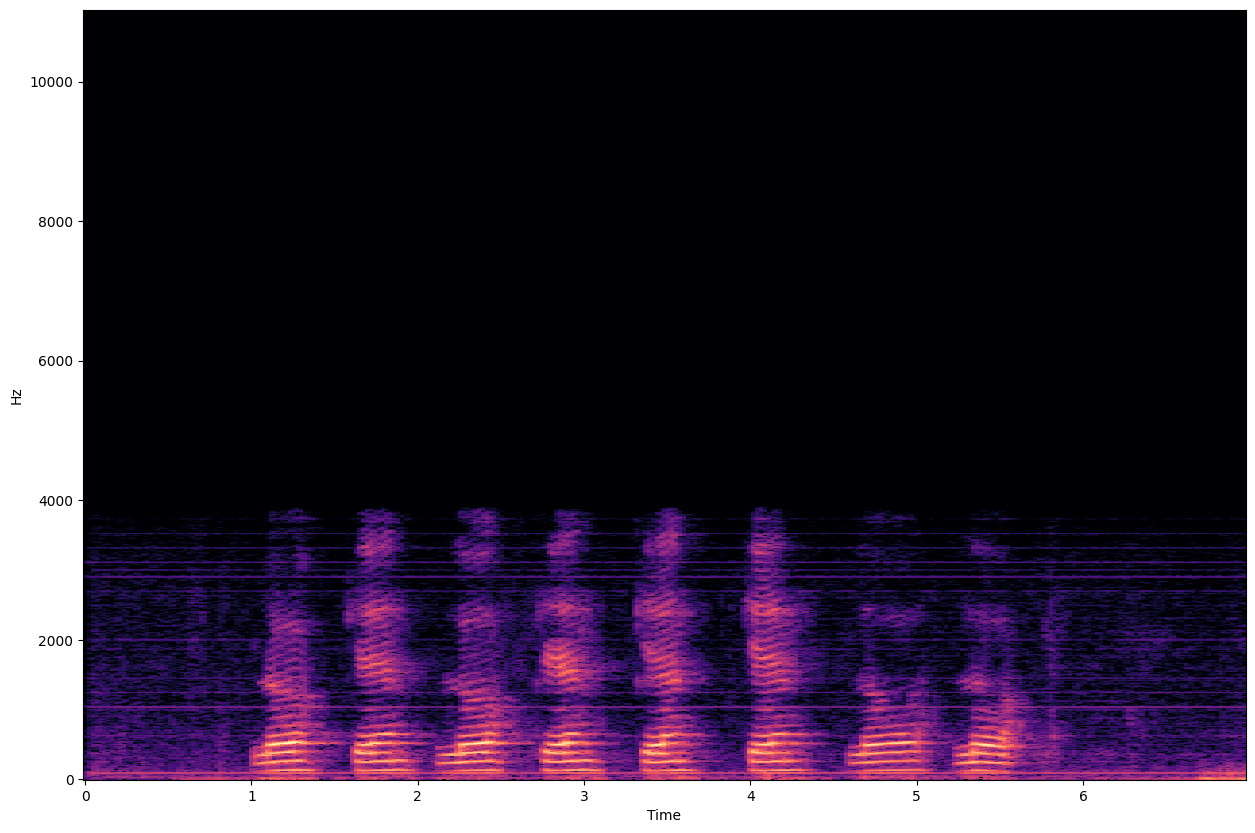

In [ ]:
stft = librosa.stft(wav)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(15,10))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')

# Задание 0.1: Анализ спектрограммы (0.5 балла)
1. Посмотрите на спектрограмму и попробуйте найти признаки, по которым можно отличить произнесение "yes" от "no".
1. В каких частотах находится основная энергия этого речевого сигнала?

### 1. Посмотрите на спектрограмму и попробуйте найти признаки, по которым можно отличить произнесение "yes" от "no".

Если 0 - это "no", а 1 - это "yes":

- У "no" бОльшая часть спектра сосредоточена на низких частотах(до 1000 Гц). У "yes" то же самое, но есть дополнительные (и довольно весомые, судя по яркому оранжево-красному цвету) составляеющие на частотах примерно от 1600 Гц до 2000 Гц
- Произнесение "no" немного длиннее, чем произнесение "yes". Это видно на спектрограмме (хоть этот момент и не так ярко выражен). На данный вывод может натолкнуть еще и прослушивание аудиозаписи: я не знаю иврит, но как будто (в интерпретации на русский) слово "no" состоит из двух букв ("ло"), а "yes" состоит из трех букв ("кен")

### 2. В каких частотах находится основная энергия этого речевого сигнала?

Практически вся энергия сигнала находится на частотах в диапазоне (0-4000) Гц

Далее энергия сигнала как будто разбивается на частотные подобласти:
- на частотах (0-1000)Гц энергия сигнала наибольшая
- на частотах (1000-3000)Гц энергия сигнала меньше, чем на предыдущих частотах, но тоже довольно большая, особенно у слов "yes"
- на частотах (3000-4000)Гц амплитуда составляющих уже совсем небольшая


# Задание 1: Мел-шкала (1 балл)
Нарисовать спектрограму в [mel-шкале](https://en.wikipedia.org/wiki/Mel_scale).
Использовать формулу, представленную Дугласом О'Шонесси.

In [ ]:
def mel(spec):
    #spec - stft spectrogram

    m = 2595 * np.log10(1 + spec/700)
    return m

    raise NotImplementedError()

In [ ]:
def test_mel():
    x = np.random.randint(100, size=(1000, 100))
    x_mel = mel(x)
    x_hz = 700.0 * (10.0 ** (x_mel / 2595.0) - 1.0)
    assert np.allclose(x, x_hz), "TEST Hertz -> Mel -> Hertz  failed. "
    print("All ok!")

test_mel()

All ok!


# Мел-фильтры
Одними из наиболее популярных акустических признаков являются Filter Banks (fbanks).
fbanks вычисляются применением нескольких (количество фильтров = количество fbanks) треугольных фильтров к мел-спектрограмме. Чтобы не делать два действия со спектрограммой, переход к мел-шкале и применение фильтров в мел-шкале можно заменить на перевод мел-фильтров в Герц-шкалу и применение их к Герц-спектрограмме.



# Задание 2 (3 балла)
<!-- Реализуйте функцию вычисления fbank по формулам библиотеки librosa.  -->

### Мел-фильтры

Реализуйте функцию вычисления fbank.
Помимо лекций описание формул можно посмотреть тут: https://studbooks.net/2037683/informatika/raschyot_filtrov.

In [ ]:
def mel_filters_pure(sr, n_fft, n_mels):
    # функция построения треугольных мел-фильтров в герц-шкале
    # sr - sample rate - частота дискретизации
    # n_fft - length of the FFT window - длина окна
    # n_mels - number of filters - количество искомых фильтров (мел-коэффициентов)
    # return mel filters matrix. [n_mel, n_fft]

    #f = librosa.fft_frequencies(sr=sr, n_fft=n_fft)  # сделали преобразование фурье с длиной окна n_fft для сигнала с частотой дискретизации sr и перевели отсчеты в частоты
    f_low = 0  # нижняя частота
    f_up = sr/2  # верхняя частота
    mel_f_low = mel(f_low)  # перевод нижней частоты по мел-шкале
    mel_f_up = mel(f_up)  # перевод верхней частоты по мел-шкале
    m = np.linspace(mel_f_low, mel_f_up, n_mels+2)  # + 2 для того, чтобы учесть еще две мел-частоты: верхнюю и нижнюю, т.е. нам нужно n_mels частот между ними
    M_hz = 700.0*(np.exp(m/1127)-1)  # перевод из мел-частот обратно в герцы

    # после перевода из мел-частот в обычные частоты, возникает проблема: разрешения по частоте не хватает, чтобы разместить треугольные мел-фильтры
    # в точных точках, которые являются рациональными числами, значит нужно как-то округлить до ближайших существующих "отсчетов частот"

    f = np.floor((n_fft+1)*M_hz/sr)  # перевели частоты в отсчеты спектра и округлили, получили "опорные точки" в спектре

    # теперь создаем банк фильтров:
    # 1-й фильтр начинается в первой точке, пик - во второй точке, заканчивается в третьей точке
    # 2-й фильтр начинается во второй точке, пик - в третьей точке, заканчивается в четвертой точке и т.д.
    filterbank = np.zeros((n_mels, 1+n_fft//2))  # создали массив который требуется на выходе
    for m in range(1, n_mels+1):  # далее строим кусочные функции-фильтры треугольного вида
        for k in range(1+n_fft//2):
            if f[m-1]<=k and k<=f[m]:  # возрастающая часть
                filterbank[m-1,k] = (k-f[m-1])/(f[m]-f[m-1])
            elif f[m]<=k and k<=f[m+1]:  # убывающая часть
                filterbank[m-1,k] = (f[m+1]-k)/(f[m+1]-f[m])

    return filterbank

    raise NotImplementedError

Обратите внимание что реализации базовых функций таких как вычисления fbank могут отличаться в различных широко используемых библиотеках. Как правило это не критично для большинства практических задач, но бывают сложности при поиске ошибок и сравнении реализаций.
Реализуйте функцию вычисления fbank по формулам библиотеки librosa по аналогии с открытым исходным кодом. Формулы, используемые в библиотеке librosa, отличаются от используемых в лекциях и некоторых других источниках. Обратите внимание на использование np.diff и np.substract, а также на нормализацию slaney. https://librosa.org/doc/latest/_modules/librosa/filters.html#mel

In [ ]:
def mel_filters_librosa(sr, n_fft, n_mels):
    # функция построения треугольных мел-фильтров в герц-шкале
    # sr - sample rate
    # n_fft - length of the FFT window
    # n_mels - number of filters
    # return mel filters matrix. [n_mel, n_fft]

    fftfreqs = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    f_low = 0  # нижняя частота
    f_up = sr/2  # верхняя частота
    mel_f_low = mel(f_low)  # перевод нижней частоты по мел-шкале
    mel_f_up = mel(f_up)  # перевод верхней частоты по мел-шкале
    m = np.linspace(mel_f_low, mel_f_up, n_mels+2)  # + 2 для того, чтобы учесть еще две мел-частоты: верхнюю и нижнюю, т.е. нам нужно n_mels частот между ними
    M_hz = 700.0*(10.0**(m/2595.0)-1.0)
    fdiff = np.diff(M_hz)  # вычислениt разностей между элементами массива M_hz
    ramps = np.subtract.outer(M_hz, fftfreqs)  # поэлементная разность массивов
    filterbank = np.zeros((n_mels, 1+n_fft//2))  # создали массив который требуется на выходе
    for i in range(n_mels):
        # вычисление нижней и верхней частот для каждого фильтра
        lower = -ramps[i] / fdiff[i]
        upper = ramps[i + 2] / fdiff[i + 1]
        filterbank[i] = np.maximum(0, np.minimum(lower, upper))
    slaney_norm = 2.0/(M_hz[2 : n_mels + 2] - M_hz[:n_mels])  # нормализация как в либросе
    filterbank*= slaney_norm[:, np.newaxis]
    return filterbank

    raise NotImplementedError

In [ ]:
assert mel_filters_librosa(32, 46, 4).shape == (4, 24) and \
    mel_filters_librosa(65, 45, 5).shape == (5, 23), "Wrong shape"
assert np.allclose(mel_filters_librosa(16, 8, 4), librosa.filters.mel(sr=16, n_fft=8, n_mels=4, htk=True))
assert np.allclose(mel_filters_librosa(8600, 512, 40), librosa.filters.mel(sr=8600, n_fft=512, n_mels=40, htk=True))
print("All ok!")

All ok!


Можно заметить, что есть небольшое расхождение в результатах формул. Для большенства практических задач это не существенно, но эти различия полезно знать при собственных экспериментах с аудио фичами а так же в случаях отладки и поиске ошибок.

Далее будем использовать функцию *mel_filters_librosa*

In [ ]:
def get_fbanks(wav: np.ndarray, sr: int, window_ms=25, step_ms=10, n_fbanks=40):
    # wav - input signal
    # sr - sample rate
    # window_ms - window length in milliseconds
    # step_ms - stft step in milliseconds
    # n_fbanks - number of filters
    # return fbank matrix [n_fbanks, time]

    n_fft = window_ms*sr//1000  # делим на 1000, так как 1сек = 1000мс и частота дискретизации как раз измеряется в отсчеты/сек, в итоге получаем отсчеты
    hop_length = step_ms*sr//1000  # рассчитали длину сдвига в "отсчетах"
    wind_ft = librosa.stft(wav, n_fft=n_fft, hop_length=hop_length)  # делаем оконное преобразование Фурье
    power_spectrum = np.abs(wind_ft)**2  # рассчитали power spectrum, возведя амплитудный в квадрат
    mels = mel_filters_librosa(sr, n_fft, n_fbanks)  # посчитали фильтры с помощью встроенной в либросу функции
    return mels.dot(power_spectrum)  #  наложили фильтры на полученный спектр и получили результат, мел-спектрограмму

    raise NotImplementedError

In [ ]:
def test_fbank(wav, sr, window_ms=25, step_ms=10, n_fbanks=40):
    n_fft = window_ms * sr//1000
    hop_length = step_ms * sr//1000
    fbanks_lib = librosa.feature.melspectrogram(y=wav, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_fbanks, htk=True)
    fbanks = get_fbanks(wav, sr, window_ms=window_ms, step_ms=step_ms, n_fbanks=n_fbanks)
    if fbanks_lib.shape != fbanks.shape:
        print("TEST FAILED")
        print(f"Shape {fbanks_lib.shape} != {fbanks.shape}")
        return 1

    if not np.allclose(fbanks_lib, fbanks):
        print('TEST PASSED BUT WITH CALCULATION ERROR')
        print(f"Average diff is {np.mean(np.abs(fbanks_lib - fbanks))}")
        return np.mean(np.abs(fbanks_lib - fbanks))

    print("TEST PASSED")
    return 0

assert test_fbank(wav[:sr*1], sr) <= 0.0003, "1 sec wav test failed"
assert test_fbank(wav, sr) <= 0.0003, "All wav test failed"
print("All ok!")

TEST PASSED
TEST PASSED
All ok!


In [ ]:
window_ms = 25
step_ms = 10
n_fbanks = 40
n_fft = window_ms * sr//1000
hop_length = step_ms * sr//1000

Визуализируем полученные фильтрбанки самописными функциями и функциями либросы:

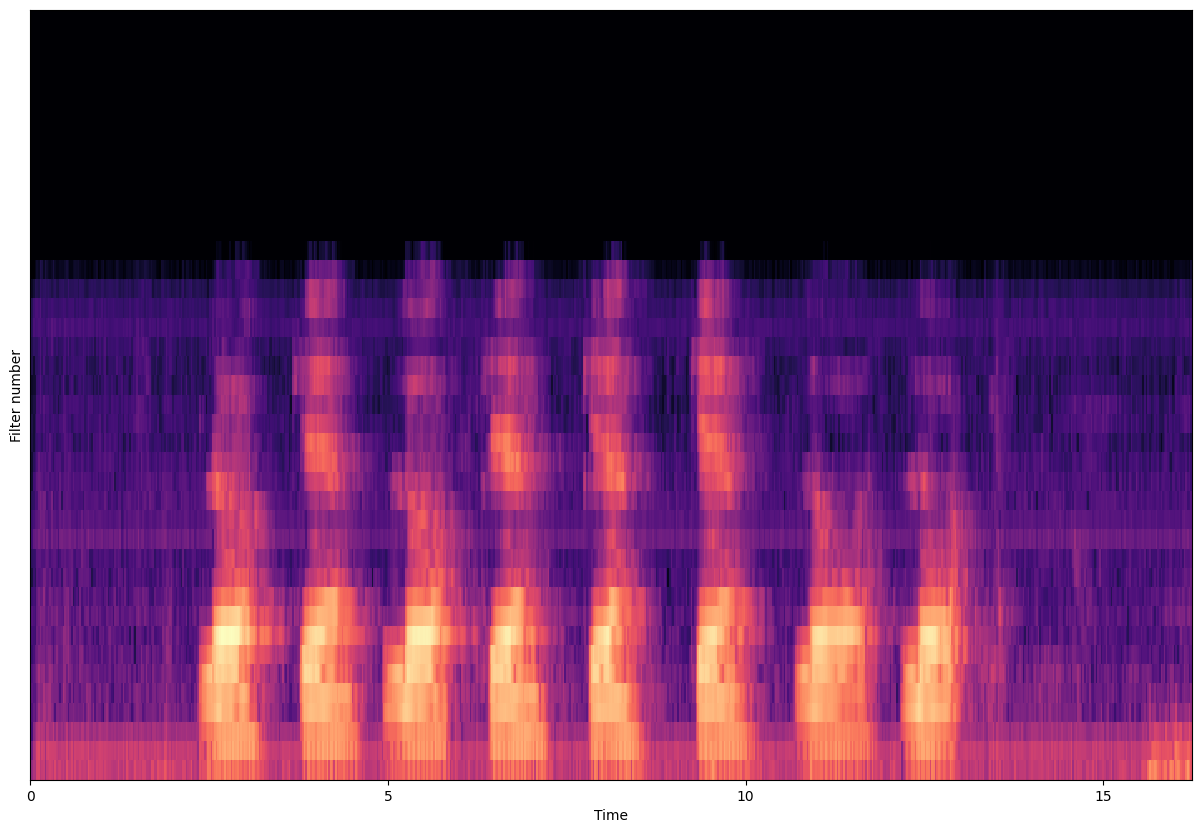

In [ ]:
fbanks = get_fbanks(wav, sr)
plt.figure(figsize=(15,10))
librosa.display.specshow(librosa.power_to_db(fbanks), sr=sr, x_axis='time')
plt.ylabel("Filter number")
plt.show()

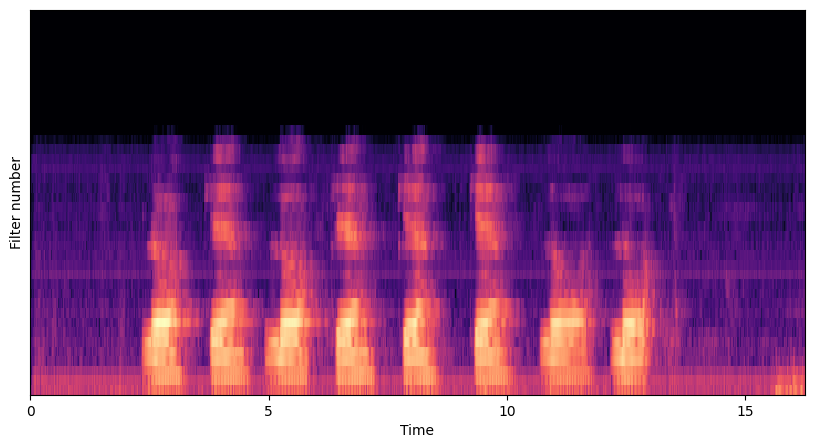

In [ ]:
fbanks_lib = librosa.feature.melspectrogram(y=wav, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_fbanks, htk=True)
plt.figure(figsize=(10,5))
librosa.display.specshow(librosa.power_to_db(fbanks_lib), sr=sr, x_axis='time')
plt.ylabel("Filter number")
plt.show()

# Задание 4 (3 балла)
Реализовать вычисление [mfcc](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum)



In [ ]:
def get_mfcc(wav: np.ndarray, sr: int, window_ms=25, step_ms=10, n_mfcc=13):
    # wav - input signal
    # sr - sample rate
    # window_ms - window length in milliseconds
    # step_ms - stft step in milliseconds
    # n_mfcc - number of filters
    # return mfcc matrix [n_mfcc, time]

    f_banks = get_fbanks(wav, sr, window_ms=window_ms, step_ms=step_ms, n_fbanks=128)
    S = 10*np.log10(f_banks)
    S = np.maximum(S, S.max() - 80.0)
    mfcc = np.empty_like(S)  # результирующий выходной массив

    # далее нужно сделать дискретное косинус-преобразование
    mfcc = np.empty_like(S)
    N = len(S)
    for i in range(S.shape[1]):
        f_cos = [0 for i in range(N)]
        for j in range(N):
            if (j == 0):
                normalize = np.sqrt(1/N)
            else:
                normalize = np.sqrt(2/N)
            ssum = 0
            for k in range(N):
                cos_trans = (S[:,i])[k]*np.cos((2*k+1)*j*np.pi/(2*N))
                ssum  += cos_trans
            f_cos[j] = normalize*ssum
        mfcc[:, i] = f_cos
    return mfcc[:n_mfcc, :]


    raise NotImplementedError()

Возможно, появится ошибка вычислений. Надо просто смириться с тем, что она есть, и сделать так, чтобы она была ниже допустимой:

In [ ]:
def test_mfcc(wav, sr, window_ms=25, step_ms=10, n_mfcc=13):
    n_fft = window_ms * sr//1000
    hop_length = step_ms * sr//1000
    mfcc_lib = librosa.feature.mfcc(y=wav, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=n_mfcc, htk=True)
    mfcc = get_mfcc(wav, sr, window_ms=window_ms, step_ms=step_ms, n_mfcc=n_mfcc)
    print(mfcc_lib.shape)
    if mfcc_lib.shape != mfcc.shape:
        print("TEST PASSED BUT WITH CALCULATION ERROR!")
        print(f"Shape {mfcc_lib.shape} != {mfcc.shape}")
        return 1

    if not np.allclose(mfcc_lib, mfcc):
        print("TEST PASSED BUT WITH CALCULATION ERROR")
        print(f"Average diff is {np.mean(np.abs(mfcc_lib - mfcc))}")
        return np.mean(np.abs(mfcc_lib - mfcc))

    print("TEST PASSED")
    return 0

assert test_mfcc(wav[:sr*1], sr) <= 0.0005, "1 sec wav test failed"
assert test_mfcc(wav, sr) <= 0.0005, "All wav test failed"
print("All ok!")

(13, 101)
TEST PASSED BUT WITH CALCULATION ERROR
Average diff is 6.449883149063419e-06
(13, 700)
TEST PASSED BUT WITH CALCULATION ERROR
Average diff is 6.838788584010716e-06
All ok!


Визуализируем *mfcc*

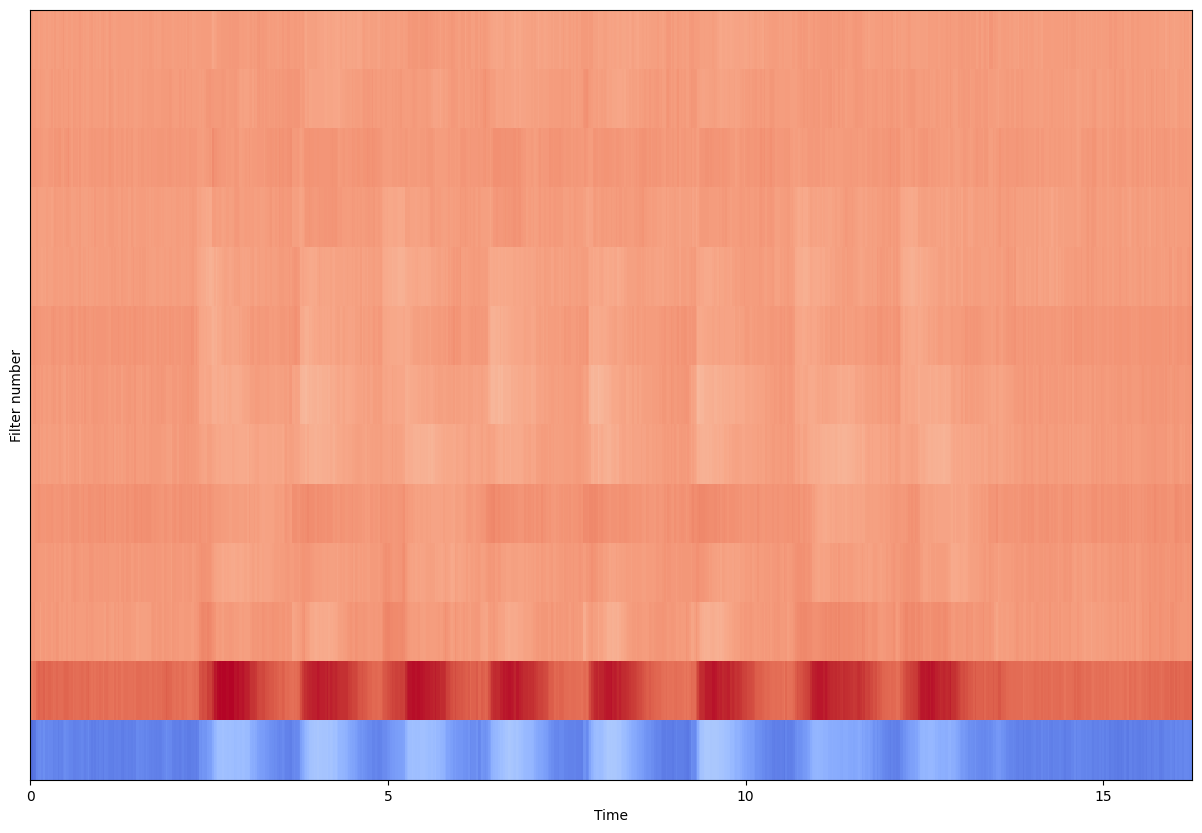

In [ ]:
mfcc = get_mfcc(wav, sr)
plt.figure(figsize=(15,10))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.ylabel("Filter number")
plt.show()

# Классификация слов
Построим простую систему, классифицирующую слова yes/no.

Загрузим весь датасет

In [ ]:
def load_yn_dataset(directory):
    X, labels = [], []
    bad_files = set(["0_1_0_1_0_0_0_0"])
    for f in glob(directory +"/*.wav"):
        name = os.path.basename(f)[:-4]
        if name in bad_files:
            continue
        y = [int(l) for l in name.split("_")]
        x, _ = librosa.load(f)
        X.append(x)
        labels.append(y)

    return X, labels

X, Y = load_yn_dataset("waves_yesno/")
print(len(X[0]),len(X))

123921 59


Послушаем одну вавку:

In [ ]:
wav, sr = librosa.load("waves_yesno/0_1_0_1_0_0_0_0.wav")
ipd.Audio(wav, rate=sr)
#print(len(wav), sr)

Отделим 20% для теста

In [ ]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y,test_size=0.2, random_state=1)

# Задание *5 (1 балл)
Voice Activity Detector (VAD) определяет, есть ли речь в текущем кадре.
Реализуйте простой VAD. Настройте VAD, чтобы хорошо определялись границы слов.

Подсказка:
Можно отличать паузу от речи по энергии mfcc спектра( или части спектра). Чтобы предотвратить скачки на краях слов, воспользуйтесь сверткой со сглаживающим окном, например, Ханна.

In [ ]:
!pip install -U featuretools

In [1]:
def test_VAD(VOICE, VA, Y, min_acc=0.95):
    def check_ali(ali, num_words):
        diff = np.array(ali[1:])  - np.array(ali[:-1])
        if diff.sum()!=0:
            print("VAD detected speech at the beginning (or end) of audio")
            return -1
        if not (diff > 0).sum() == (diff > 0).sum() == num_words:
            return -2
        return 0

    bad_i = []
    err =0
    for i, (ali, y) in enumerate(zip(VA, Y)):
        # print(i)
        # print(len(VOICE[i]), len(ali))
        assert len(VOICE[i]) == len(ali), "shapes doesn't match"
        if check_ali(ali, len(y)) != 0:
            bad_i.append(i)
            err+=1
    acc = (len(Y) - err)/len(Y)
    print(f"Accuracy {acc}")
    if len(bad_i) >0:
        print(f"ids with error {bad_i}")
    assert acc >= min_acc , f"Accuracy must be >= {min_acc}"
    print("Test passed")

test_VAD(X_train, train_VA, Y_train)
test_VAD(X_test, test_VA, Y_test)
print("VAD ok!")

NameError: ignored

# Задание *6 (2 балла)
Обучите классификатор, определяющий, какое слово было сказано. Используйте VAD для разбиения входных файлов на отдельные слова. Классификацию можно сделать, например, с помощью SVM по усредненным признаки выделеных VAD'ом слов. Или любым другим удобным для вас способом. Добейтесь точности больше 0.95

In [ ]:
# YOUR CODE HERE

### Результаты

Визуализируйте кривые обучения классификатора или приведите логи обучения

In [ ]:
# YOUR CODE HERE